In [1]:
import numpy as np
import pandas as pd
import PIL
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
import cv2

from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
path_train = r"C:\Users\Divik Mathur\Desktop\Seed Classification\train"
data_dir = pathlib.Path(path_train)
folder = list(data_dir.glob('*'))
images = list(data_dir.glob('*/*.png')) #list of all images (full path)
print('Folder Structure:')
for f in folder:
    print(f)
print('\nNumber of images: ', len(images))

Folder Structure:
C:\Users\Divik Mathur\Desktop\Seed Classification\train\Black-grass
C:\Users\Divik Mathur\Desktop\Seed Classification\train\Charlock
C:\Users\Divik Mathur\Desktop\Seed Classification\train\Cleavers
C:\Users\Divik Mathur\Desktop\Seed Classification\train\Common Chickweed
C:\Users\Divik Mathur\Desktop\Seed Classification\train\Common wheat
C:\Users\Divik Mathur\Desktop\Seed Classification\train\Fat Hen
C:\Users\Divik Mathur\Desktop\Seed Classification\train\Loose Silky-bent
C:\Users\Divik Mathur\Desktop\Seed Classification\train\Maize
C:\Users\Divik Mathur\Desktop\Seed Classification\train\Scentless Mayweed
C:\Users\Divik Mathur\Desktop\Seed Classification\train\Shepherds Purse
C:\Users\Divik Mathur\Desktop\Seed Classification\train\Small-flowered Cranesbill
C:\Users\Divik Mathur\Desktop\Seed Classification\train\Sugar beet

Number of images:  4750


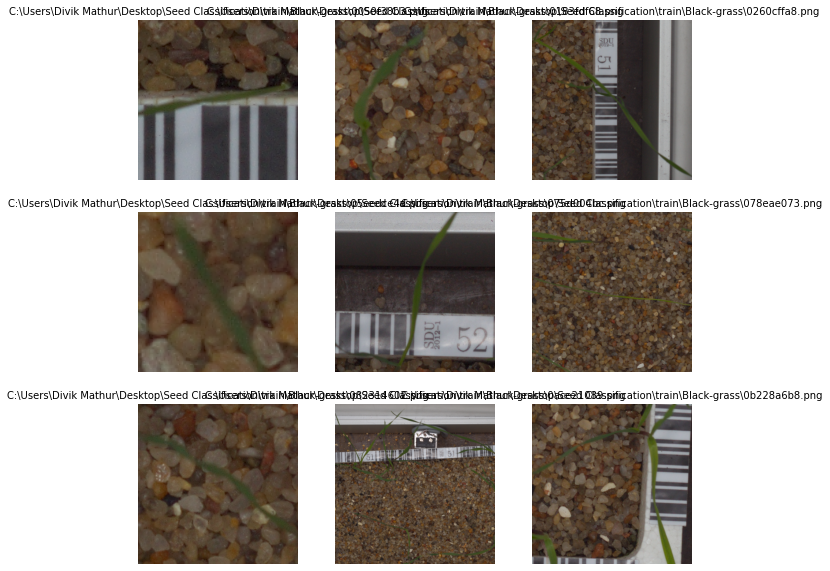

In [3]:
fig = plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.title(str(images[i]).split('/')[-1], fontsize=10) #get the file name and disply as title
    plt.imshow(PIL.Image.open(images[i]))
    ax = plt.axis("off")

### Preparing Data for Modeling

In [4]:
image_size = 256
batch_size = 32

In [5]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

In [6]:
train_gen = idg.flow_from_directory(path_train,
                                    target_size=(image_size, image_size),
                                    subset='training',
                                    class_mode='categorical',
                                    batch_size=batch_size,
                                    shuffle=True,
                                    seed=1
                                    )

Found 3803 images belonging to 12 classes.


In [7]:
val_gen = idg.flow_from_directory(path_train,
                                  target_size=(image_size, image_size),                                                   
                                  subset='validation',
                                  class_mode='categorical',
                                  batch_size=batch_size,
                                  shuffle=True,
                                  seed=1
                                  )

Found 947 images belonging to 12 classes.


### Classify Train Data

In [8]:
classes = train_gen.class_indices
print(classes)
class_names = []
for c in classes:
    class_names.append(c)
print('The name of the classes are: ', class_names)

{'Black-grass': 0, 'Charlock': 1, 'Cleavers': 2, 'Common Chickweed': 3, 'Common wheat': 4, 'Fat Hen': 5, 'Loose Silky-bent': 6, 'Maize': 7, 'Scentless Mayweed': 8, 'Shepherds Purse': 9, 'Small-flowered Cranesbill': 10, 'Sugar beet': 11}
The name of the classes are:  ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


### Explore Classification

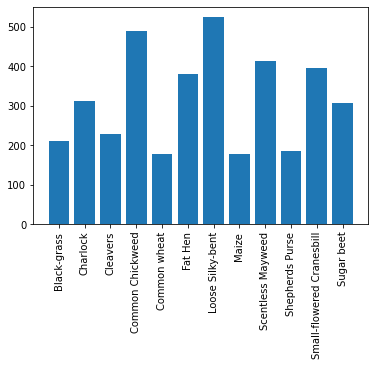

In [9]:
unique, counts = np.unique(train_gen.classes, return_counts=True)
dict1 = dict(zip(train_gen.class_indices, counts))

keys = dict1.keys()
values = dict1.values()

plt.xticks(rotation='vertical')
bar = plt.bar(keys, values)

In [10]:
x,y = next(train_gen)

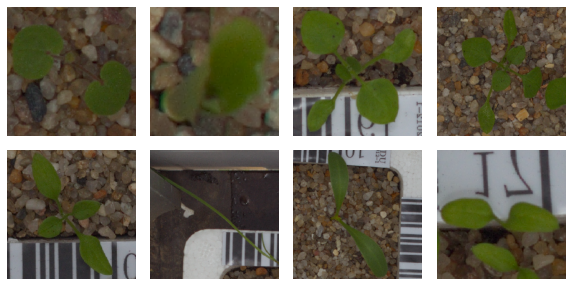

In [11]:
fig = plt.figure(None, (10,10),frameon=False)
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(2, 4),  
                 axes_pad=0.2, 
                 share_all=True,
                 )
for i in range(2*4):
    ax = grid[i]
    ax.imshow(x[i],cmap='Greys_r')
    ax.axis('off')

### Modeling

In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(image_size,image_size,3,))) # Input layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu')) # 2D Convolution layer
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2))) # Max Pool layer 
model.add(tf.keras.layers.BatchNormalization()) # Normalization layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides = (1,1), activation='relu')) # 2D Convolution layer
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2))) # Max Pool layer 
model.add(tf.keras.layers.BatchNormalization()) # Normalization layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu')) # 2D Convolution layer
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2))) # Max Pool layer 
model.add(tf.keras.layers.BatchNormalization()) # Normalization layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu')) # 2D Convolution layer
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2))) # Max Pool layer 
model.add(tf.keras.layers.GlobalMaxPool2D()) # Global Max Pool layer
model.add(tf.keras.layers.Flatten()) # Dense Layers after flattening the data
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2)) # Dropout
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.BatchNormalization()) # Normalization layer
model.add(tf.keras.layers.Dense(12, activation='softmax')) # Add Output Layer

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 127, 127, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       7

In [15]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('plant_classifier.h5', #where to save the model
                                                save_best_only=True, 
                                                monitor='val_accuracy', 
                                                mode='max', 
                                                verbose = 1)

### Training

In [16]:
activity = model.fit(train_gen,
          epochs=5, # Increase number of epochs if you have sufficient hardware
          steps_per_epoch= 3803//batch_size,  # Number of train images // batch_size
          validation_data=val_gen,
          validation_steps = 947//batch_size, # Number of val images // batch_size
          callbacks = [checkpoint],
          verbose = 1
)

Epoch 1/5
118/118 [==============================] - 554s 5s/step - loss: 2.0856 - accuracy: 0.3087 - val_loss: 2.8530 - val_accuracy: 0.1390

Epoch 00001: val_accuracy improved from -inf to 0.13901, saving model to plant_classifier.h5
Epoch 2/5
118/118 [==============================] - 555s 5s/step - loss: 1.3861 - accuracy: 0.5317 - val_loss: 3.8062 - val_accuracy: 0.1369

Epoch 00002: val_accuracy did not improve from 0.13901
Epoch 3/5
118/118 [==============================] - 553s 5s/step - loss: 1.0398 - accuracy: 0.6508 - val_loss: 3.8798 - val_accuracy: 0.1444

Epoch 00003: val_accuracy improved from 0.13901 to 0.14440, saving model to plant_classifier.h5
Epoch 4/5
118/118 [==============================] - 554s 5s/step - loss: 0.8393 - accuracy: 0.7178 - val_loss: 4.4199 - val_accuracy: 0.1649

Epoch 00004: val_accuracy improved from 0.14440 to 0.16487, saving model to plant_classifier.h5
Epoch 5/5
118/118 [==============================] - 536s 5s/step - loss: 0.7318 - accur

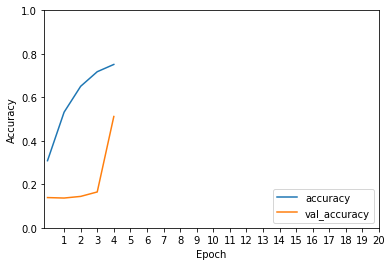

In [17]:
plt.plot(activity.history['accuracy'], label='accuracy')
plt.plot(activity.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(list(range(1,21)))
plt.ylim([0, 1])
plt.legend(loc='lower right')

### Prediction

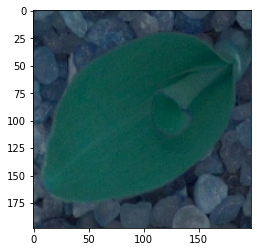

In [18]:
maize = cv2.imread(path_train+'/Maize/6e9ff31e7.png')
ax = plt.imshow(maize)

In [19]:
maize = cv2.resize(maize, (256,256))
maize_batch = np.expand_dims(maize, axis=0)
conv_maize = model.predict(maize_batch)
conv_maize.shape

(1, 12)

In [20]:
score = tf.nn.softmax(conv_maize[0])

(85, 85, 1)
(85, 85)


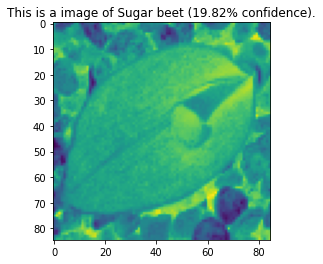

In [21]:
simple_model = tf.keras.models.Sequential()
simple_model.add(tf.keras.layers.Conv2D(1,3,3,input_shape=maize.shape)) # 3x3 kernel

maize_batch = np.expand_dims(maize, axis=0)
conv_maize2 = simple_model.predict(maize_batch)
conv_maize2 = np.squeeze(conv_maize2, axis=0)
    
print(conv_maize2.shape)
conv_maize2 = conv_maize2.reshape(conv_maize2.shape[:2])
print(conv_maize2.shape)

ax = plt.imshow(conv_maize2)
ax = plt.title("This is a image of {} ({:.2f}% confidence).".format(class_names[np.argmax(score)], 100 * np.max(score)), fontsize=12)

## Transfer Learning

In [22]:
from matplotlib.image import imread
import tensorflow

In [26]:
my_data_dir = r"C:\Users\Divik Mathur\Desktop\Seed Classification"

In [27]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 

['.ipynb_checkpoints', 'test', 'train']

In [28]:
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'

In [29]:
CATEGORIES = os.listdir(train_path)
CATEGORIES

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [30]:
train = []
for category_id, category in enumerate(CATEGORIES):
    #count = 0
    for file in os.listdir(os.path.join(train_path, category)):
        #renamed_to = category+'.'+str(count)+'.png'
        train.append(['train/{}/{}'.format(category, file),file,category_id, category])
        #os.rename((train_dir+category+"/"+file),(train_dir+category+"/"+renamed_to))
        #count = count + 1
#train = pd.DataFrame(train, columns=['file','filename', 'category_id', 'category','renamed_to'])
train = pd.DataFrame(train, columns=['file','filename', 'category_id', 'category'])
train.shape

(4750, 4)

In [31]:
test = []

#count = 0
for file in os.listdir(test_path):
  #renamed_to = str(count)+'.png'
  test.append(['test/{}'.format(file),file])
  #os.rename((test_dir+file),(test_dir+renamed_to))
  #count = count + 1
test = pd.DataFrame(test, columns=['filepath','file'])
test.shape

(794, 2)

In [32]:
train.tail(5)

,file,filename,category_id,category
4745,train/Sugar beet/fc293eacb.png,fc293eacb.png,11,Sugar beet
4746,train/Sugar beet/fc441208c.png,fc441208c.png,11,Sugar beet
4747,train/Sugar beet/fed9406b2.png,fed9406b2.png,11,Sugar beet
4748,train/Sugar beet/fef5e7066.png,fef5e7066.png,11,Sugar beet
4749,train/Sugar beet/ffa401155.png,ffa401155.png,11,Sugar beet


In [33]:
test.head(5)

,filepath,file
0,test/0021e90e4.png,0021e90e4.png
1,test/003d61042.png,003d61042.png
2,test/007b3da8b.png,007b3da8b.png
3,test/0086a6340.png,0086a6340.png
4,test/00c47e980.png,00c47e980.png


In [35]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau, EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D,Lambda,BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg19_preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input

from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['font.size'] = 16

### Freeze layers in VGG-19

SEED = 42
WIDTH = 370
HEIGHT = 370
DEPTH = 3
INPUT_SHAPE = (WIDTH, HEIGHT, DEPTH)

In [37]:
def freezeLayersVGG(vgg_model):
    trainable = False
    for layer in vgg_model.layers:
        if layer.name in ['block5_conv1', 'block4_conv1']:
            trainable = True
            
        if trainable:
            layer.trainable = True
        else:
            layer.trainable = False
    return vgg_model

### Identify layers in VGG 19

In [38]:
vgg = VGG19(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE)

output = vgg.layers[-1].output
output = Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model = freezeLayersVGG(vgg_model)

pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])  

<ipython-input-38-2ae062852efa>:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x000002BBB1346850>,input_2,False
1,<keras.layers.convolutional.Conv2D object at 0x000002BBB13466A0>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x000002BBAC015FA0>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x000002BBB1346910>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x000002BBB136D430>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x000002BBB137B6A0>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x000002BBB1366CD0>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x000002BBB2367640>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x000002BBB2367D00>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x000002BBB1360070>,block3_conv3,False


### Freeze layers in Resnet 50

In [39]:
def freezeLayersResNet(resnet_model):
    trainable = False
    for layer in resnet_model.layers:
        if layer.name in ['res5c_branch2b', 'res5c_branch2c', 'activation_97']:
            trainable = True
            
        if trainable:
            layer.trainable = True
        else:
            layer.trainable = False
    return resnet_model

### Identify layers in Resnet 50

In [40]:
resnet = ResNet50(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE)

output = resnet.layers[-1].output
output = Flatten()(output)
resnet_model = Model(resnet.input, output)

freezeLayersResNet(resnet_model)
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in resnet_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

<ipython-input-40-2c5c772df101>:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x000002BBB23B7430>,input_3,False
1,<keras.layers.convolutional.ZeroPadding2D object at 0x000002BBB23B7C40>,conv1_pad,False
2,<keras.layers.convolutional.Conv2D object at 0x000002BBABFEDFA0>,conv1_conv,False
3,<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000002BBAA09A340>,conv1_bn,False
4,<keras.layers.core.Activation object at 0x000002BBAA665730>,conv1_relu,False
...,...,...,...
171,<keras.layers.convolutional.Conv2D object at 0x000002BBB26F8160>,conv5_block3_3_conv,False
172,<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000002BBB27154C0>,conv5_block3_3_bn,False
173,<keras.layers.merge.Add object at 0x000002BBB270EB80>,conv5_block3_add,False
174,<keras.layers.core.Activation object at 0x000002BBB271D3D0>,conv5_block3_out,False


### Function for printing history

In [41]:
def printHistory(history, title, epochs):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    t = f.suptitle(title, fontsize=12)
    f.subplots_adjust(top=0.85, wspace=0.3)

    epoch_list = list(range(1,epochs+1))
    ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
    ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_xticks(np.arange(0, epochs+1, 5))
    ax1.set_ylabel('Accuracy Value')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Accuracy')
    l1 = ax1.legend(loc="best")

    ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
    ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
    ax2.set_xticks(np.arange(0, epochs+1, 5))
    ax2.set_ylabel('Loss Value')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss')
    l2 = ax2.legend(loc="best")

### Create the model from the scratch

In [42]:
def createModel(pretrainedModel, fineTune, number_of_hidden_layers, activation, optimizer, learning_rate, epochs):
    print("Create Model")

    existing_model = 0 
    
    if pretrainedModel == "ResNet-50":
        existing_model = ResNet50(weights='imagenet', input_shape=INPUT_SHAPE, include_top=False)
        if fineTune == True:
            existing_model = freezeLayersResNet(existing_model)
        else:
            for layer in existing_model.layers:
                existing_model.trainable = False  # freeze feature extracting layers of ResNet 50
    elif pretrainedModel == "VGG-19":
        existing_model = VGG19(weights='imagenet', input_shape=INPUT_SHAPE, include_top=False)
        
        if fineTune == True:
            existing_model = freezeLayersVGG(existing_model)
        else:
            for layer in existing_model.layers:
                layer.trainable = False  # freeze feature extracting layers of VGG 19

    output = existing_model.layers[-1].output
    output = Flatten()(output)
    transfer_model = Model(existing_model.input, output)

    model = Sequential()
    model.add(transfer_model)
    model.add(BatchNormalization()) # Normalize the activations of the previous layer at each batch

    
    for i in range(0,number_of_hidden_layers):
        model.add(Dense(512))
        model.add(Activation(activation))
        model.add(Dropout(0.5))
        model.add(BatchNormalization()) # Normalize the activations of the previous layer at each batch


    model.add(Dense(12, activation='softmax'))

    if optimizer == 'SGD':
        opt = SGD(lr=learning_rate, decay=learning_rate / epochs)
    elif optimizer == 'Adam':
        opt = Adam(lr=learning_rate, decay=learning_rate / epochs)

    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    model.summary()
    return model

### Train model function with 5 fold cross validation

In [43]:
def trainModel(images, pretrainedModel, fineTune, epochs, batch_size, learning_rate, cross_validation_folds, activation, number_of_hidden_layers, optimizer):
    print("Train Model")
     
    datagen_train = ImageDataGenerator(rotation_range=360, # Degree range for random rotations
                            width_shift_range=0.2, # Range for random horizontal shifts
                            height_shift_range=0.2, # Range for random vertical shifts
                            zoom_range=0.2, # Range for random zoom
                            horizontal_flip=True, # Randomly flip inputs horizontally
                            vertical_flip=True)
    
    datagen_valid = ImageDataGenerator(rotation_range=360, # Degree range for random rotations
                            width_shift_range=0.2, # Range for random horizontal shifts
                            height_shift_range=0.2, # Range for random vertical shifts
                            zoom_range=0.2, # Range for random zoom
                                         horizontal_flip=True, # Randomly flip inputs horizontally
                            vertical_flip=True)
    
        
    print("Cross validation")
    kfold = StratifiedKFold(n_splits=cross_validation_folds, shuffle=True)
    cvscores = []
    models = []
    iteration = 1
    
    t = images.category_id
    
    for train_index, test_index in kfold.split(np.zeros(len(t)), t):
        annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-5)
        checkpoint = ModelCheckpoint('/kaggle/working/model.h5', verbose=1, save_best_only=True)
        print("======================================")
        print("Iteration = ", iteration)

        iteration = iteration + 1

        train = images.loc[train_index]
        test = images.loc[test_index]

        print("======================================")
        
        model = createModel(pretrainedModel, fineTune, number_of_hidden_layers, activation, optimizer, learning_rate, epochs)

        print("======================================")
        
        train_generator = datagen_train.flow_from_dataframe(dataframe=train,
                                                  directory=my_data_dir,
                                                  x_col="file",
                                                             y_col="category",
                                                  batch_size=batch_size,
                                                  seed=SEED,
                                                  shuffle=True,
                                                  class_mode="categorical",
                                                  target_size=(HEIGHT, WIDTH));
        valid_generator=datagen_valid.flow_from_dataframe(dataframe=test,
                                                  directory=my_data_dir,
                                                  x_col="file",
                                                  y_col="category",
                                                  batch_size=batch_size,
                                                  seed=SEED,
                                                  shuffle=False,
                                                  class_mode="categorical",
                                                  target_size=(HEIGHT, WIDTH));
        
        STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
        STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
         #Trains the model on data generated batch-by-batch by a Python generator
        history = model.fit_generator(generator=train_generator,
                            validation_data = valid_generator, 
                            steps_per_epoch=STEP_SIZE_TRAIN, 
                            validation_steps=STEP_SIZE_VALID, 
                            epochs=epochs, 
                            callbacks=[annealer, checkpoint],
                            verbose=1)
        
        scores = model.evaluate_generator(generator=valid_generator, steps=STEP_SIZE_VALID)
        print("Accuarcy %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        cvscores.append(scores[1] * 100)
        models.append(model)
        
        printHistory(history, pretrainedModel, epochs)

    accuracy = np.mean(cvscores);
    std = np.std(cvscores);
    print("Accuracy: %.2f%% (+/- %.2f%%)" % (accuracy, std))
     # Save best model.
    best_model_index = np.argmax(scores, axis=0) 
    best_model= models[best_model_index]
    best_model.save('/kaggle/working/best_model')

    return train_generator.class_indices
    

### Training with Resnet50

In [ ]:
class_indices = trainModel(
    train,
    pretrainedModel = "ResNet-50", #ResNet-50
    fineTune = False,
    batch_size =32,
    cross_validation_folds = 5,
    learning_rate = 0.001,
    activation = 'relu',
    number_of_hidden_layers = 4,
    optimizer = 'Adam',
    epochs = 5
)

Train Model
Cross validation
Iteration =  1
Create Model


C:\Users\Divik Mathur\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_3 (Functional)         (None, 294912)            23587712  
_________________________________________________________________
batch_normalization_9 (Batch (None, 294912)            1179648   
_________________________________________________________________
dense_8 (Dense)              (None, 512)               150995456 
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
dense_9 (Dense)              (None, 512)              

C:\Users\Divik Mathur\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
118/118 [==============================] - 1733s 14s/step - loss: 2.8985 - accuracy: 0.1444 - val_loss: 2.3213 - val_accuracy: 0.2392

Epoch 00001: val_loss improved from inf to 2.32132, saving model to /kaggle/working\model.h5


C:\Users\Divik Mathur\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/5
118/118 [==============================] - 1664s 14s/step - loss: 2.3007 - accuracy: 0.2646 - val_loss: 1.6041 - val_accuracy: 0.4106

Epoch 00002: val_loss improved from 2.32132 to 1.60408, saving model to /kaggle/working\model.h5
Epoch 3/5
118/118 [==============================] - 1804s 15s/step - loss: 1.9104 - accuracy: 0.3585 - val_loss: 1.2874 - val_accuracy: 0.5259

Epoch 00003: val_loss improved from 1.60408 to 1.28745, saving model to /kaggle/working\model.h5
Epoch 4/5
118/118 [==============================] - 1542s 13s/step - loss: 1.6383 - accuracy: 0.4188 - val_loss: 1.0551 - val_accuracy: 0.5981

Epoch 00004: val_loss improved from 1.28745 to 1.05511, saving model to /kaggle/working\model.h5
Epoch 5/5
118/118 [==============================] - 1590s 13s/step - loss: 1.4279 - accuracy: 0.4896 - val_loss: 0.9451 - val_accuracy: 0.6519

Epoch 00005: val_loss improved from 1.05511 to 0.94505, saving model to /kaggle/working\model.h5


C:\Users\Divik Mathur\anaconda3\lib\site-packages\keras\engine\training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuarcy accuracy: 64.66%
Iteration =  2
Create Model
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_4 (Functional)         (None, 294912)            23587712  
_________________________________________________________________
batch_normalization_14 (Batc (None, 294912)            1179648   
_________________________________________________________________
dense_13 (Dense)             (None, 512)               150995456 
_________________________________________________________________
activation_8 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 512)               2048      
_________________________________________________________________


In [ ]:
class_indices={'Black-grass': 0,
 'Charlock': 1,
 'Cleavers': 2,
 'Common Chickweed': 3,
 'Common wheat': 4,
 'Fat Hen': 5,
 'Loose Silky-bent': 6,
 'Maize': 7,
 'Scentless Mayweed': 8,
 'Shepherds Purse': 9,
 'Small-flowered Cranesbill': 10,
 'Sugar beet': 11}
class_indices

In [ ]:
image_datagen_for_test = ImageDataGenerator(rotation_range=360, # Degree range for random rotations
                            width_shift_range=0.2, # Range for random horizontal shifts
                            height_shift_range=0.2, # Range for random vertical shifts
                            zoom_range=0.2, # Range for random zoom
                            horizontal_flip=True, # Randomly flip inputs horizontally
                            vertical_flip=True
                              )

test_generator=image_datagen_for_test.flow_from_dataframe(dataframe=test,
                                                  directory=test_path,
                                                  x_col="file",
                                                  y_col=None,
                                                  batch_size=1,
                                                  seed=SEED,
                                                  shuffle=False,
                                                  class_mode=None,
                                                  target_size=INPUT_SHAPE[:2],
                                                            color_mode='rgb');

model = load_model('/kaggle/working/best_model/')
filenames = test_generator.filenames
nb_samples = len(filenames)
print(nb_samples)

# Final test predictions
predictions = model.predict_generator(test_generator,steps = nb_samples) 
predicted_class_indices=np.argmax(predictions,axis=1)

labels = dict((v,k) for k,v in class_indices.items())
predicted_labels = [labels[k] for k in predicted_class_indices]

results=pd.DataFrame({"file":filenames,
                      "species":predicted_labels})
print (results)
results.to_csv("submission.csv",index=False)